![It’s Not Your Imagination. Summers Are Getting Hotter](https://github.com/mschermann/loaded_climate_dice/raw/master/itsnotyourimagination.png)
<sup>(Source: Popovich & Pearce (2017): *[It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html)*, New York Times)</sup>

On July 28, 2017, the New York Times published an article by Nadja Popovich and Adam Pearce with the intriguing title "[It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html)". As the title suggests, the article makes the claim that summers are getting hotter and hotter. The main argument of the article is the visualization depicted above. It shows "how summer temperatures have shifted toward more extreme heat over the past several decades". 

This is a very effective visualization because it communicates relatively complicated scientific information (a distribution of temperatures) in an approachable way. All you need to understand is that temperatures move to the right, which means summers get hotter. (The [article](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html) also features an animated visualization, which shows how the temperature distribution has changed over the decades.). This post replicates the visualization and reflects on the underlying data preparation and data wrangling activities. 
<!-- TEASER_END -->

## What does the visualization show?

In a nutshell, the visualization shows that our chances to experience hot weather during summer months are rising. The visualization that the distribution of temperature measurements on Earth's Northern hemisphere during the summer months (more specifically, June, July, and August) shifts toward hotter temperature over the decades. 

The visualization displays a probability density functions for each decade since the 1950s. Probability density functions are fairly complicated statistical instruments, when compared to the typical bar charts or scatter plots in most visualizations. However, the reader does not necessarily need to understand the meaning of probability density functions. Instead, the authors use color (blue, orange, and red) to denote colder and hotter temperatures and animations to visualize the change of temperatures:
* The (grey) area represents the base distribution of temperatures. This baseline is calculated from the summer temperature measurements between 1951 to 1980. The colored areas represent the summer temperature distribution between 2005 and 2015. 
* As the probability density function shifts to the right, the colored areas change accordingly. For instance, in the initial probability density function, the reader will probably not notice the small dark red area that denotes extreme temperatures. However, in the final probability density function, the dark red area is substantially larger. 
* The animation allows the reader to understand the shift of colors as the visualization cycles through the decades. 

I encourage you to visit the [original article](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html) in the New York Times to experience the full effect of the visualization. 

## Where does the data come from?

The article is a consumer-friendly version of visualizations reported in the following research paper that has been published in the Proceedings of the National Academy of Sciences of the United States of America (PNAS):

>James Hansen, Makiko Sato, Reto Ruedy (2012): **[Perception of Climate Change](http://www.pnas.org/content/109/37/E2415)**. Proceedings of the National Academy of Sciences, 109(37) E2415-E2423; DOI: [10.1073/pnas.1205276109](https://doi.org/10.1073/pnas.1205276109)

The paper offers the fundamental idea for the visualization. While these original visualizations convey the same content, the visualizations have a distinct "scientific" look and feel ;)

![Public Perception of Climate Change and the New Climate Dice](http://www.columbia.edu/~mhs119/PerceptionsAndDice/FigP1.gif)
<sup>(Source: Hansen et al. (2012): *[Perception of Climate Change](http://www.columbia.edu/~mhs119/PerceptionsAndDice/)*, Columbia University)</sup>

It is important to note the following characteristics of the data in Hansen et al. 2012:
 * The shift in the average temperature is only for the Northern hemisphere.
 * The paper uses averaged temperature data of 250km squares.

## A replication

I replicate the Hansen et al. (2012) using the following steps:

1. A replication of the data analysis presented by Hansen et al. (2012)
2. A replication of the visualizations created by Hansen et al. (2012)
3. An attempt to get as close as possible to the look and feel of the visualization in the New York Times. 

## Setup

We set up our environment to allow [multiple outputs](https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs) for each code cell. Also, we use the [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html) command to display [matplotlib](https://matplotlib.org) plots in the Jupyter notebook.

In [1]:
# Multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Show matplotlib plots inline
%matplotlib inline

For data wrangling, we use the [Pandas](http://pandas.pydata.org) library, one of the most versatile workhorses for data analytics. Additionally, we need the [NumPy](http://www.numpy.org) library for general scientific computing.

In [2]:
import pandas as pd
import numpy as np

We format the display of rows and the number of decimals. _(These commands setup Jupyter to my personal preferences. They are not required.)_

In [3]:
# Display up to 500 rows at a time
pd.set_option('display.max_rows', 500)
# Format the display of numbers to two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Furthermore, we use [altair](https://altair-viz.github.io) to render visualizations.

In [4]:
import altair as alt
#Render altair charts inline 
alt.renderers.enable('notebook') # Change this depending on where you run the notebook.

RendererRegistry.enable('notebook')

## Data

The Hansen et al. (2012) paper uses data from the Goddard Institute for Space Studies (GISS), which includes data from the Global Historical Climatology Network (GHCN). Obtaining the GHCN data is surprisingly difficult because it is located on FTP servers, which frequently throw errors (at least on my machine). 

However, browsing through the description of the GISS data will lead you to the description of the station data. The station data consists of average monthly temperatures  for stations around the globe. 

The [data for the stations](https://data.giss.nasa.gov/gistemp/stdata/) is downloadable [here](https://data.giss.nasa.gov/gistemp/stdata/v3.mean_GISS_homogenized.zip). The data is being continuously updated, so if you download this notebook, some values may be slightly different.  

The data is wrapped in a `zip` file that contains a `csv` file called `step2.v3.csv`. The following paper describes the dataset:
>Lawrimore, J. H., M. J. Menne, B. E. Gleason, C. N. Williams, D. B. Wuertz, R. S. Vose, and J. Rennie (2011), [An overview of the Global Historical Climatology Network monthly mean temperature data set, version 3](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2011JD016187), J. Geophys. Res., 116, D19121, doi: [10.1029/2011JD016187](https://doi.org/10.1029/2011JD016187).

Let's read the data.

In [5]:
raw = pd.read_csv('https://raw.githubusercontent.com/mschermann/loaded_climate_dice/master/step2.v3.csv', header=None)
raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,101603550000,1966,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1374,1144
1,101603550000,1967,1044,1164,1334,1474,1854,1974,2434,2594,2294,2054,1704,1114
2,101603550000,1968,1134,1274,1344,1644,1854,2114,2514,2454,2274,1954,1664,1324
3,101603550000,1969,1214,1184,1384,1534,1864,1984,2274,2454,2244,1894,1654,1124
4,101603550000,1970,1334,1144,1264,1424,1694,2154,2364,2534,2374,-9999,1524,1186


A quick look at the data reveals three potential issues:
1. The data has no header information.
2. The data has strange values that initially do not look like temperatures. 
3. The data clearly has missing values which are denoted as `-9999`.

This [README](https://www1.ncdc.noaa.gov/pub/data/ghcn/v3/README) file explains the data.

For the fun of it, we nevertheless explore the data and confirm the structure of the data.

## Data Exploration

Let's interpret, validate, and confirm our understanding of the data.

### Column 0

The first column seems to be the station identifier. You can confirm this assumption by entering a few station identifiers in the search form [here](https://data.giss.nasa.gov/gistemp/stdata/). They check out.

In [6]:
raw[0].sample(3, random_state=123)

264787    425004277140
214468    425002537350
332436    501947140000
Name: 0, dtype: int64

Here are the links to the stations above:
* [425004277140](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=425004277140&ds=5&dt=1) in [Scipio](https://www.google.com/maps/place/39%C2%B015'00.0%22N+112%C2%B006'36.0%22W/@39.2212063,-112.1401839,13z/data=!4m5!3m4!1s0x0:0x0!8m2!3d39.25!4d-112.11), Utah, USA.
* [425002537350](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=425002537350&ds=5&dt=1) in  [Hebron](https://www.google.com/maps/place/40%C2%B010'12.0%22N+97%C2%B035'24.0%22W/@40.17,-97.59,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d40.17!4d-97.59), Nebraska, USA.
* [501947140000](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=501947140000&ds=5&dt=1) in [Cootamundra](https://www.google.com/maps/place/34%C2%B037'48.0%22S+148%C2%B001'12.0%22E/@-34.63,148.02,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d-34.63!4d148.02), New South Wales, Australia.

_(If you run this notebook on your machine, these values may change because of the underlying data changes)_.

### Column 1

The second column seems to contains years. Let's confirm this. 

In [7]:
np.sort(raw.iloc[:,1].unique()) # display a sorted list of 
# unique values in the second column

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

This looks very much like years ranging from 1880 to 2018.

### Columns 2 to 13

Then the file has additional 12 columns. They represent the 12 months of the year. Again, you can confirm this using the search form [here](https://data.giss.nasa.gov/gistemp/stdata/). 

For instance, the average temperature in January in [Santa Cruz, California](https://en.wikipedia.org/wiki/Santa_Cruz,_California#Climate) is 9.8 degrees  Celcius (49.6 degrees Fahrenheit). The closest station is [425000479160](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=425000479160&dt=1&ds=5) in [Santa Cruz](https://www.google.com/maps/place/36%C2%B059'24.0%22N+121%C2%B059'24.0%22W/@36.9899905,-122.0600364,12z/data=!4m5!3m4!1s0x0:0x0!8m2!3d36.99!4d-121.99).

In [8]:
sc = raw[raw[0]==425000479160]
sc[1].min()
sc[1].max()
round((sc[~(sc[2]==-9999)][2].mean())/100, 2) # multiple with 100 to get real temperatures. 

1893

2018

9.83

The station in Santa Cruz reports an average temperature of 9.83 degrees Celsius in January for the period between 1893 and 2018.

The 12 columns contain the average temperature per month. The values are in hundredths of a degree Celsius. For example, 983 means an average of 9.83 degree Celsius (49.694 degrees Fahrenheit).

`-9999` denotes missing values. Again, the [README](https://www1.ncdc.noaa.gov/pub/data/ghcn/v3/README) file explains the values (and many more).

<sup>(Source: J. H. Lawrimore, M. J. Menne, B. E. Gleason, C. N. Williams, 
            D. B. Wuertz, R. S. Vose, and J. Rennie (2011), [An overview of the Global Historical Climatology Network monthly mean temperature data set, version 3](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2011JD016187), J. Geophys. Res., 116, D19121, doi: [10.1029/2011JD016187](https://doi.org/10.1029/2011JD016187))</sup>

## Data Preparation

With this interpretation, we rename the original file to reflect our interpretation. We read the data as follows:
* Missing values (`na_values`) are `-9999`
* The first column is called `station_id`
* The second column is called `year`
* The remaining 12 columns are called `jan`, `feb`,`mar`,`apr`,`may`,`jun`,`jul`,`aug`,`sep`,`oct`,`nov`,`dec`

In [9]:
data = raw.copy()
data = data.replace(-9999,np.NaN)
data.columns = ['station_id','year',\
               'jan','feb','mar','apr',\
               'may','jun','jul','aug',\
               'sep','oct','nov','dec']

We have a look at the first five rows of the dataset.

In [10]:
data.head()

,station_id,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,101603550000,1966,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1374.00,1144.00
1,101603550000,1967,1044.00,1164.00,1334.00,1474.00,1854.00,1974.00,2434.00,2594.00,2294.00,2054.00,1704.00,1114.00
2,101603550000,1968,1134.00,1274.00,1344.00,1644.00,1854.00,2114.00,2514.00,2454.00,2274.00,1954.00,1664.00,1324.00
3,101603550000,1969,1214.00,1184.00,1384.00,1534.00,1864.00,1984.00,2274.00,2454.00,2244.00,1894.00,1654.00,1124.00
4,101603550000,1970,1334.00,1144.00,1264.00,1424.00,1694.00,2154.00,2364.00,2534.00,2374.00,nan,1524.00,1186.00


In [11]:
len(data['station_id'].unique())

5991

The dataset contains temperature information from 5991 stations. 

## Data Wrangling

The Hansen et al. (2012) paper focusses on the summer months only. The paper argues that the shift of the probability density function is more pronounced in the summer months (See charts above).

We focus our data on the three months of summer: June, July, August.

In [12]:
summer = data.loc[:,['station_id', 'year', 'jun', 'jul', 'aug']]

In [13]:
summer.head()

,station_id,year,jun,jul,aug
0,101603550000,1966,nan,nan,nan
1,101603550000,1967,1974.00,2434.00,2594.00
2,101603550000,1968,2114.00,2514.00,2454.00
3,101603550000,1969,1984.00,2274.00,2454.00
4,101603550000,1970,2154.00,2364.00,2534.00


To make our life easier, we drop rows with any missing values.

In [14]:
summer.dropna(inplace=True)

In [15]:
len(summer['station_id'].unique())

5991

Despite removing missing values, we have data for at least one summer for each station.

The probability density functions should represent the full summer. After all, the title of the New York Times article is "Summers Are Getting Hotter". The Hansen et al. (2012) paper is using the mean of the summer months. This is what we do, too.

We create a mean for each row in the `summer` data frame and store it in a new column called `JJA`, which stands for 
 * **J**une, 
 * **J**uly, 
 * **A**ugust.

In [16]:
summer['JJA'] = summer[['jun', 'jul', 'aug']].mean(axis=1) #generate a mean for each row

We do not need the columns for the individual months any longer, so we drop them. 

In [17]:
summer.drop(['jun', 'jul', 'aug'], axis=1, inplace=True)

The individual stations are all around the globe. A station near the equator will measure vastly different temperatures than a station near the south pole. However, we are only interested in changes in the mean temperature over time. 

Thus, we **standardize** the `JJA` column by calculating the [z-score](https://en.wikipedia.org/wiki/Standard_score) for each temperature measurement. You calculate z-scores by subtracting the mean from each value and then divide by the standard deviation. The result of this process are values with a mean of 0 and a standard deviation of 1.

## A first attempt

In [18]:
summer_fa = summer.copy()

To calculate the z-score, we need the mean and the standard deviation for each station. We use Pandas' [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [transform](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html) functions to generate the z-score. 

The `transform` function only returns the transformed values but does not change the order, we can simply write it back as a new column.

In [19]:
summer_fa['z'] = summer.groupby('station_id')['JJA'].\
transform(lambda x: (x - x.mean()) / x.std())

A quick look at the summer data shows that we now have the z-score for each summer and station.

In [20]:
summer_fa.head()

,station_id,year,JJA,z
1,101603550000,1967,2334.00,-0.90
2,101603550000,1968,2360.67,-0.63
3,101603550000,1969,2237.33,-1.88
4,101603550000,1970,2350.67,-0.74
5,101603550000,1971,2416.00,-0.07


As expected the mean for each station is 0 and the standard deviation is 1.

In [21]:
summer_fa.groupby('station_id')['z'].mean().sample(5, random_state=123)
summer_fa.groupby('station_id')['z'].std().sample(5, random_state=123)

station_id
207424040000    0.00
205505640000    0.00
617100200000    0.00
425001164460   -0.00
501956240000    0.00
Name: z, dtype: float64

station_id
207424040000   1.00
205505640000   1.00
617100200000   1.00
425001164460   1.00
501956240000   1.00
Name: z, dtype: float64

In [22]:
round(summer_fa['z'].mean(), 2)
round(summer_fa['z'].std(), 2)

0.0

0.99

We use the [hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) function to visualize the histogram (a visual representation of the probaility density functions). Since the z-score is a continuous measure, we create one hundred bins. 

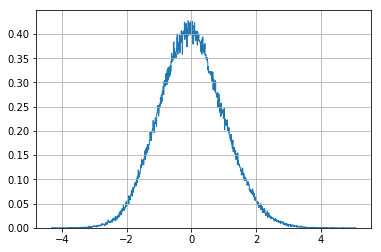

In [23]:
summer_fa['z'].hist(bins=1000, histtype='step', density=True);

This looks very much like the end result we would like to have. However, currently, all the temperatures are averages across the whole period. We do not have the baseline yet. The original idea by Hansen et al. (2012) is to use the temperatures of the years between 1951 and 1980 as the baseline. 

## Understanding the distribution of data across the time periods

Before we establish the baseline, we need to have a clear understanding of what subsets of the data are relevant for the baseline. In general, we have three subsets:
* Data prior to the baseline suggested by Hansen et al. (2012)
* Data of the baseline between 1951 and 1980.
* Data after the baseline.

In [24]:
len(summer[summer['year']<=1950]['station_id'].unique())
len(summer[(summer['year']>1950) & (summer['year']<1981)]['station_id'].unique())
len(summer[summer['year']>=1981]['station_id'].unique())

3884

5784

5151

* 3884 stations report data from prior to the baseline. 
* 5784 stations report data on the baseline period. This is an increase by 1900 stations compared to prior to the baseline.
* 5151 stations report data beyond the baseline period. This is a decrease by 633 stations compared to the baseline.

In [25]:
prior_baseline = summer[summer['year']<=1950]['station_id']
baseline = summer[(summer['year']>1950) & (summer['year']<1981)]['station_id']
beyond_baseline = summer[summer['year']>=1981]['station_id']

We analyze the distribution of stations across the timeperiod.

In [26]:
# Stations that only appear in the prior data
only_prior = prior_baseline[(~prior_baseline.isin(baseline)) \
                            & (~prior_baseline.isin(beyond_baseline))].unique()
# Stations that appear in prior and(?) in beyond
resurrected_prior = prior_baseline[(~prior_baseline.isin(baseline)) \
                                   & (prior_baseline.isin(beyond_baseline))].unique()
# Stations that only appear in the baseline
only_base = baseline[(~baseline.isin(prior_baseline)) \
                     & (~baseline.isin(beyond_baseline))].unique()
# Stations that only appear in the beyond data
only_beyond = beyond_baseline[(~beyond_baseline.isin(prior_baseline)) \
                              & (~beyond_baseline.isin(baseline))].unique()
# Stations that only appear in prior and baseline
prior_and_base = prior_baseline[(prior_baseline.isin(baseline)) \
                                & (~prior_baseline.isin(beyond_baseline))].unique()
# Stations that only appear in baseline and beyond data
base_and_beyond = baseline[(baseline.isin(beyond_baseline)) \
                           & (~baseline.isin(prior_baseline))].unique()
# Stations that appear in prior, baseline, and beyond
prior_and_base_and_beyond = prior_baseline[(prior_baseline.isin(baseline)) \
                                           & (prior_baseline.isin(beyond_baseline))].unique()

#len(only_prior)
#len(resurrected_prior)
#len(only_base)
#len(only_beyond)
#len(prior_and_base)
#len(base_and_beyond)
#len(prior_and_base_and_beyond)

(len(only_prior)+
len(resurrected_prior)+
len(only_base)+
len(only_beyond)+
len(prior_and_base)+
len(base_and_beyond)+
len(prior_and_base_and_beyond))

5991

The following table shows the distribution of stations over the relevant periods (prior to baseline, during baseline, beyond baseline).

|Number of Stations|Percentage|Description|
|:------------------|----------|-----------|
|131 | 2.19% | Stations that report data only prior to the baseline.
|7 | 0.12% | Stations that report data prior to and beyond the baseline but not on the baseline (seems like they have been resurrected).
|158 | 2.64% | Stations that report data only on the baseline.
|69 | 1.15%| Stations that report data only beyond the baseline.
|551 | 9.12% | Stations that report data prior to the baseline and on the baseline.
|1880 | 31.38% | Stations that report data on the baseline and beyond 
|3195 | 53.33% | Stations that report data on all three periods
|**5991** | **~ 100%** | Total

## Establishing the baseline

Currently, the z-scores are calculated using the full dataset. We establish the baseline by calculating the mean and the standard deviation using station data from the time period of 1951 to 1980.

We create a new data set that only contains the baseline data. We copy the summer data, group the data by the `station_id`, and use the [agg](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function to create the required statistical information mean and standard deviation. Additionally, we create the count to make sure that the mean and standard deviation was derived from a decent number of measurements. We [reset the index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) to obtain a standard data frame.

In [27]:
base = summer[(summer['year']>1950) & (summer['year']<1981)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()

In [28]:
len(summer[(summer['year']>1950)]['station_id'].unique()) - \
len(base['station_id'].unique())

76

We have 76 stations that offer no data on the base period. These are the 7 "resurrected" stations and the 69 stations installed after 1980 (See the table above).

Let's have a look at the result.

In [29]:
base.head()

,station_id,count,mean,std
0,101603550000,12,2321.42,59.90
1,101603600000,15,2232.73,55.83
2,101603900000,26,2326.72,71.35
3,101603950010,7,2251.43,55.51
4,101604020000,7,2200.86,48.32


Now, we add the baseline count, mean, and standard deviation to the original summer data.

In [30]:
summer_base = pd.merge(summer, base, how='left', \
                       left_on='station_id', right_on='station_id')

In [31]:
summer_base[['count','mean','std']].describe()
len(summer_base['station_id'].unique()) # number of all stations 
len(summer_base[summer_base['count'].notnull()]['station_id'].unique()) # stations with baseline
len(summer_base[summer_base['std'].notnull()]['station_id'].unique()) # full data

,count,mean,std
count,358410.00,358410.00,357925.00
mean,25.24,1996.33,75.63
std,5.61,660.30,25.10
min,1.00,-6686.21,1.92
25%,23.00,1625.67,59.00
50%,27.00,2065.72,74.93
75%,30.00,2478.36,90.81
max,30.00,3728.96,328.93


5991

5784

5766

The data makes sense. The minimum mean temperature is -66.86 degrees Celsius in [Vostok](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=700896060008&ds=5&dt=1) on [Antarctica](https://www.google.com/maps/place/78%C2%B027'00.0%22S+106%C2%B052'12.0%22E/@-79.6518209,47.2865677,1.93z/data=!4m5!3m4!1s0x0:0x0!8m2!3d-78.45!4d106.87). The maximum mean temperature is 37.28 degrees Celcius in [Sibi](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show.cgi?id=219416970000&ds=5&dt=1) in [Pakistan](https://www.google.com/maps/place/29%C2%B033'00.0%22N+67%C2%B052'48.0%22E/@29.3308281,58.9756818,5z/data=!4m5!3m4!1s0x0:0x0!8m2!3d29.55!4d67.88).

The number of stations also checks out. 5784 of the 5991 stations report data on the baseline. We lose 18 (5784-5766) stations because it is not possible to calculate the standard deviation. These stations have only 1 year within the baseline (either 1951 or 1980).

In [32]:
len(summer_base[(summer_base['mean'].notnull()) & \
            (summer_base['std'].isnull())]['station_id'].unique())

18

In [33]:
summer_base.dropna(inplace=True) # removes stations without standard deviation.

Calculating the z-score is now very easy. We simply take the `JJA`, subtract the `mean` and divide by `std`.

In [34]:
summer_base['z_base'] = (summer_base['JJA']-summer_base['mean'])/summer_base['std']
summer_base.head()

,station_id,year,JJA,count,mean,std,z_base
0,101603550000,1967,2334.00,12.00,2321.42,59.90,0.21
1,101603550000,1968,2360.67,12.00,2321.42,59.90,0.66
2,101603550000,1969,2237.33,12.00,2321.42,59.90,-1.40
3,101603550000,1970,2350.67,12.00,2321.42,59.90,0.49
4,101603550000,1971,2416.00,12.00,2321.42,59.90,1.58


In [35]:
summer_base['z_base'].describe()

count   357925.00
mean         0.19
std          1.33
min        -77.83
25%         -0.62
50%          0.14
75%          0.94
max         58.69
Name: z_base, dtype: float64

The `min` and `max` values show that there are some outliers. 

These outliers appear in the dataset because we have calculated the mean and the standard deviation only on the baseline time period. That means a station that began operation in 1978 only has three observations even though it may have far more observations on the complete dataset. See the following example. 

In [36]:
summer_base[abs(summer_base['z_base'])>15]['station_id'].unique()

array([223404390000, 303822800000, 425911860010, 503962530000,
       632133630000])

In [37]:
base[base['station_id']==632133630000]
summer_base[summer_base['station_id']==632133630000]

,station_id,count,mean,std
5217,632133630000,3,1611.67,12.02


,station_id,year,JJA,count,mean,std,z_base
332534,632133630000,1978,1601.67,3.00,1611.67,12.02,-0.83
332535,632133630000,1979,1608.33,3.00,1611.67,12.02,-0.28
332536,632133630000,1980,1625.00,3.00,1611.67,12.02,1.11
332537,632133630000,1981,1621.67,3.00,1611.67,12.02,0.83
332538,632133630000,1983,1631.67,3.00,1611.67,12.02,1.66
332539,632133630000,1984,1548.33,3.00,1611.67,12.02,-5.27
332540,632133630000,1985,1655.00,3.00,1611.67,12.02,3.61
332541,632133630000,1986,1675.00,3.00,1611.67,12.02,5.27
332542,632133630000,1987,1741.67,3.00,1611.67,12.02,10.82
332543,632133630000,1988,1805.00,3.00,1611.67,12.02,16.09


We ignore them for now by restricting the data to +/- 5 standard deviations.

In [38]:
sb = summer_base[abs(summer_base['z_base'])<5].copy()
len(sb['station_id'].unique())

5766

## The baseline histograms

Let's have a look at the histogram, again.

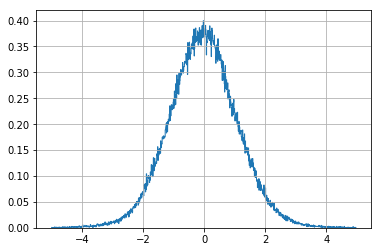

In [39]:
sb[sb['year']<1981]['z_base'].hist(bins=1000, histtype = 'step', density=True);

If we now look at the data since 2000, we notice the shift to the right. This looks promising.

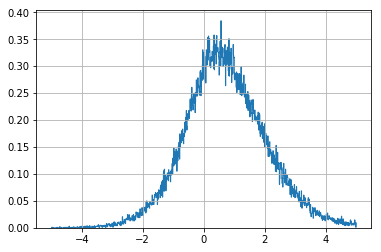

In [40]:
sb[sb['year']>=1981]['z_base'].hist(bins=1000, histtype = 'step', density=True);

## Include the decades

We add a column to the data that contains the decade starting with 1951, 1961, 1971 and so on.

In [41]:
#https://stackoverflow.com/questions/48856982/divide-data-by-decade-then-plot-it-seaborn-box-and-whisker
sb['decade'] = (sb['year'] // 10) * 10 + 1
sb.loc[(sb['year'] % 10) == 0, 'decade'] = sb['decade'] - 10

Let's have a look at the data.

In [42]:
sb.head()

,station_id,year,JJA,count,mean,std,z_base,decade
0,101603550000,1967,2334.00,12.00,2321.42,59.90,0.21,1961
1,101603550000,1968,2360.67,12.00,2321.42,59.90,0.66,1961
2,101603550000,1969,2237.33,12.00,2321.42,59.90,-1.40,1961
3,101603550000,1970,2350.67,12.00,2321.42,59.90,0.49,1961
4,101603550000,1971,2416.00,12.00,2321.42,59.90,1.58,1971


Let's plot the data per decade.

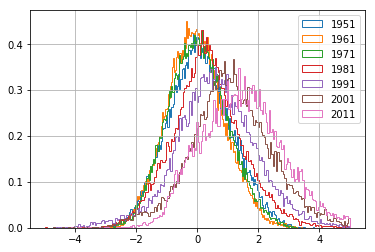

In [43]:
sb[sb['decade']==1951]['z_base'].hist(bins=200, histtype = 'step', label='1951', density=True)
sb[sb['decade']==1961]['z_base'].hist(bins=200, histtype = 'step', label='1961', density=True)
sb[sb['decade']==1971]['z_base'].hist(bins=200, histtype = 'step', label='1971', density=True)
sb[sb['decade']==1981]['z_base'].hist(bins=200, histtype = 'step', label='1981', density=True)
sb[sb['decade']==1991]['z_base'].hist(bins=200, histtype = 'step', label='1991', density=True)
sb[sb['decade']==2001]['z_base'].hist(bins=200, histtype = 'step', label='2001', density=True)
sb[sb['decade']==2011]['z_base'].hist(bins=200, histtype = 'step', label='2011', density=True).legend(loc='upper right');

That is very close to the results in Hansen et al. (2012). It is important to note that we use the complete station data (Not just the data from the Northern hemisphere as in the two articles.)

## Focus on the Northern hemisphere

The Goddard Institute for Space Studies (GISS) also provides more details on the [stations](https://data.giss.nasa.gov/gistemp/station_data/) [here](https://data.giss.nasa.gov/gistemp/stdata/v3.temperature.inv.txt). This is a text file(!) with very problematic formatting. Simply reading the file does not work. We need a [fixed-width reader](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html). Lucky us, Pandas provides one. 

In [44]:
colspecs = [(0,11),(12,42),(43,49),(50,57)]
stations = pd.read_fwf('https://raw.githubusercontent.com/mschermann/loaded_climate_dice/master/v3.temperature.inv.txt', colspecs=colspecs, names=['station_id', 'name', 'lat', 'lon'], header=None, index_col=0, skiprows=40).reset_index()

In [45]:
stations.sample(10, random_state=123)

,station_id,name,lat,lon
5057,42572636001,GRAND HAVEN USA,43.10,-86.20
6916,64917052000,KIRKLARELI,41.73,27.22
4345,42500405187,LEWISBURG EXP STN,35.41,-86.81
2949,40371889002,"ROSSLAND CITY YARD,BC",49.08,-117.80
4159,42500335041,MC CONNELLSVILLE LK 7,39.65,-81.86
1542,21648078000,TOUNGOO,18.92,96.47
3559,42500104670,JEROME,42.73,-114.52
5770,50194899000,CORRYONG,-36.20,147.88
1036,20558314000,HUOSHAN,31.40,116.33
1680,22147192000,CHINJU,35.20,128.10


In [46]:
len(stations)
len(sb['station_id'].unique())

7371

5766

Strangely, the station ids from the temperature dataset have an additional zero at the end, which we need to remove.

In [47]:
sb['station_id'].sample(10, random_state=123)

161343    425001357690
165175    425001475420
212359    425003415040
204032    425003127190
200009    425003021290
13940     141684240000
172277    425002000320
93083     308860680000
45677     208408310000
238753    425004480620
Name: station_id, dtype: int64

In [48]:
#https://stackoverflow.com/questions/33034559/how-to-remove-last-the-two-digits-in-a-column-that-is-of-integer-type
sb['station_id'] = sb['station_id'].astype(str).str[:-1].astype(np.int64)

We have more stations than being used in our temperature dataset. We extract the `stations` that are in temperature dataset.

In [49]:
stations = stations[stations['station_id'].isin(sb['station_id'])]

In [50]:
len(stations)

5766

We expect [latitude](https://en.wikipedia.org/wiki/Latitude) in the range between -90 degrees and 90 degrees. Similarly, [longitude](https://en.wikipedia.org/wiki/Longitude) data should be in the range between -180 degrees and 180 degrees. 

In [51]:
np.sort(stations['lat'].unique())
np.sort(stations['lon'].unique())

array([-90.  , -80.02, -78.45, ...,  80.62,  81.6 ,  82.5 ])

array([-179.37, -178.72, -178.48, ...,  178.57,  179.22,  179.5 ])

Now, we can merge the station information with the weather information.

In [52]:
loc_sb = pd.merge(sb, stations, how='left', left_on='station_id', right_on='station_id')

Let's have a look and drop all rows with missing values.

In [53]:
loc_sb.head()
loc_sb.dropna(inplace=True)
len(loc_sb['station_id'].unique())

,station_id,year,JJA,count,mean,std,z_base,decade,name,lat,lon
0,10160355000,1967,2334.00,12.00,2321.42,59.90,0.21,1961,SKIKDA,36.93,6.95
1,10160355000,1968,2360.67,12.00,2321.42,59.90,0.66,1961,SKIKDA,36.93,6.95
2,10160355000,1969,2237.33,12.00,2321.42,59.90,-1.40,1961,SKIKDA,36.93,6.95
3,10160355000,1970,2350.67,12.00,2321.42,59.90,0.49,1961,SKIKDA,36.93,6.95
4,10160355000,1971,2416.00,12.00,2321.42,59.90,1.58,1971,SKIKDA,36.93,6.95


5766

Next, we need to filter the information so that we only get the Northern hemisphere. The station information [explains](https://data.giss.nasa.gov/gistemp/stdata/v3.temperature.inv.txt):
> Lat  =latitude in degrees, negative = South of Equator

In [54]:
nh_loc_sb = loc_sb[loc_sb['lat']>0].copy()
sh_loc_sb = loc_sb[loc_sb['lat']<0].copy()
len(nh_loc_sb['station_id'].unique())
len(sh_loc_sb['station_id'].unique())

4790

976

Roughly 83% of all stations are in the Northern hemisphere.

## Histograms by decade

In the decades leading up to the base period, the temperatures meander around the mean.

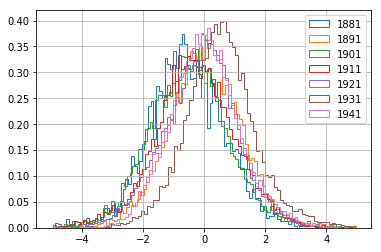

In [55]:
nh_loc_sb[nh_loc_sb['decade']==1881]['z_base'].hist(bins=100, histtype = 'step', label='1881', density=True)
nh_loc_sb[nh_loc_sb['decade']==1891]['z_base'].hist(bins=100, histtype = 'step', label='1891', density=True)
nh_loc_sb[nh_loc_sb['decade']==1901]['z_base'].hist(bins=100, histtype = 'step', label='1901', density=True)
nh_loc_sb[nh_loc_sb['decade']==1911]['z_base'].hist(bins=100, histtype = 'step', label='1911', density=True)
nh_loc_sb[nh_loc_sb['decade']==1921]['z_base'].hist(bins=100, histtype = 'step', label='1921', density=True)
nh_loc_sb[nh_loc_sb['decade']==1931]['z_base'].hist(bins=100, histtype = 'step', label='1931', density=True)
nh_loc_sb[nh_loc_sb['decade']==1941]['z_base'].hist(bins=100, histtype = 'step', label='1941', density=True).legend(loc='upper right');

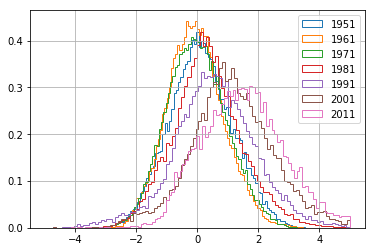

In [56]:
nh_loc_sb[nh_loc_sb['decade']==1951]['z_base'].hist(bins=100, histtype = 'step', label='1951', density=True)
nh_loc_sb[nh_loc_sb['decade']==1961]['z_base'].hist(bins=100, histtype = 'step', label='1961', density=True)
nh_loc_sb[nh_loc_sb['decade']==1971]['z_base'].hist(bins=100, histtype = 'step', label='1971', density=True)
nh_loc_sb[nh_loc_sb['decade']==1981]['z_base'].hist(bins=100, histtype = 'step', label='1981', density=True)
nh_loc_sb[nh_loc_sb['decade']==1991]['z_base'].hist(bins=100, histtype = 'step', label='1991', density=True)
nh_loc_sb[nh_loc_sb['decade']==2001]['z_base'].hist(bins=100, histtype = 'step', label='2001', density=True)
nh_loc_sb[nh_loc_sb['decade']==2011]['z_base'].hist(bins=100, histtype = 'step', label='2011', density=True).legend(loc='upper right');

The results for the Northern hemisphere are almost identical to our result above. Also, the results are almost identical to the Hansen et al. (2012) paper (first chart on the left):

![Public Perception of Climate Change and the New Climate Dice](http://www.columbia.edu/~mhs119/PerceptionsAndDice/FigP1.gif)
<sup>(Source: Hansen et al. (2012): *[Perception of Climate Change](http://www.columbia.edu/~mhs119/PerceptionsAndDice/)*, Columbia University)</sup>

## The Southern hemisphere

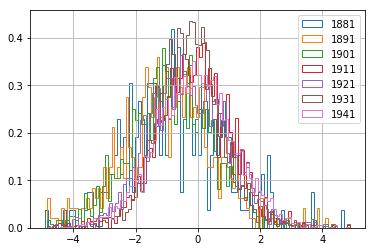

In [57]:
sh_loc_sb[sh_loc_sb['decade']==1881]['z_base'].hist(bins=100, histtype = 'step', label='1881', density=True)
sh_loc_sb[sh_loc_sb['decade']==1891]['z_base'].hist(bins=100, histtype = 'step', label='1891', density=True)
sh_loc_sb[sh_loc_sb['decade']==1901]['z_base'].hist(bins=100, histtype = 'step', label='1901', density=True)
sh_loc_sb[sh_loc_sb['decade']==1911]['z_base'].hist(bins=100, histtype = 'step', label='1911', density=True)
sh_loc_sb[sh_loc_sb['decade']==1921]['z_base'].hist(bins=100, histtype = 'step', label='1921', density=True)
sh_loc_sb[sh_loc_sb['decade']==1931]['z_base'].hist(bins=100, histtype = 'step', label='1931', density=True)
sh_loc_sb[sh_loc_sb['decade']==1941]['z_base'].hist(bins=100, histtype = 'step', label='1941', density=True).legend(loc='upper right');

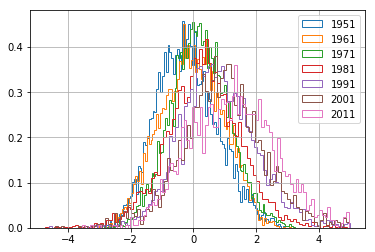

In [58]:
sh_loc_sb[sh_loc_sb['decade']==1951]['z_base'].hist(bins=100, histtype = 'step', label='1951', density=True)
sh_loc_sb[sh_loc_sb['decade']==1961]['z_base'].hist(bins=100, histtype = 'step', label='1961', density=True)
sh_loc_sb[sh_loc_sb['decade']==1971]['z_base'].hist(bins=100, histtype = 'step', label='1971', density=True)
sh_loc_sb[sh_loc_sb['decade']==1981]['z_base'].hist(bins=100, histtype = 'step', label='1981', density=True)
sh_loc_sb[sh_loc_sb['decade']==1991]['z_base'].hist(bins=100, histtype = 'step', label='1991', density=True)
sh_loc_sb[sh_loc_sb['decade']==2001]['z_base'].hist(bins=100, histtype = 'step', label='2001', density=True)
sh_loc_sb[sh_loc_sb['decade']==2011]['z_base'].hist(bins=100, histtype = 'step', label='2011', density=True).legend(loc='upper right');

The results for the Southern hemisphere also show the shift to the right. However, the shift is far less pronounced. Also, we have far fewer stations for the Southern hemisphere.

## Correcting for Data Biases

Hansen et al. (2012) note two characteristics of the results. First, as clearly visible, the temperature moves to the right. Second and more subtle, the distribution of temperatures becomes wider and flatter. Thus, Hansen et al. (2012) argue that the variance of the temperatures increases, too. However, this interpretation is not without challenges. 

A response article to Hansen et al. (2012) challenges the second interpretation, the increase in variance, of the data:

>Andrew Rhines, Peter Huybers (2013): [Frequent summer temperature extremes reflect changes in the mean, not the variance](http://www.pnas.org/content/110/7/E546), Proceedings of the National Academy of Sciences, 110(7) E546; DOI: [10.1073/pnas.1218748110](https://doi.org/10.1073/pnas.1218748110)

The authors argue that the data is biased towards higher variance for the following reasons:
1. Normalizing time series with the standard deviation of the baseline only introduces a bias because "the mean temperature of individual time series generally differs from zero during the later period". This difference in the means across the time series increases the variance.
2. Trends in the time series also increase the variance. 
3. We have fewer stations in the dataset for later periods. Recall that 5784 stations report data on the baseline period but only 5151 report data beyond the baseline. 

The original variance ratio between baseline and the time period 1981-2010 is 1.88. Rhines and Huybers (2013) suggest to debias the data in the following way:
1. Removing the sample means independently will reduce the ratio to 1.49.
2. Removing differences in the spatial variance between the baseline and the time period 1981-2010 will reduce the ratio to 1.24
3. Accounting for the increase in errors due to fewer stations will reduce the ratio to 0.98. 

Before we replicate these approaches to debiasing, let's have a closer look at the data from the perspective of Rhines and Huybers (2013).

### Comparing the variances

First, we look at the variances in the various time periods. We use the data from the Northern hemisphere.

In [59]:
round(nh_loc_sb[(nh_loc_sb['year']>1950) & (nh_loc_sb['year']<1981)]['z_base'].mean(), 2)
round(nh_loc_sb[(nh_loc_sb['year']>1950) & (nh_loc_sb['year']<1981)]['z_base'].var(), 2)
round(nh_loc_sb[(nh_loc_sb['year']>=1981) & (nh_loc_sb['year']<2011)]['z_base'].mean(), 2)
round(nh_loc_sb[(nh_loc_sb['year']>=1981) & (nh_loc_sb['year']<2011)]['z_base'].var(), 2)
round(nh_loc_sb[(nh_loc_sb['year']>=1981)]['z_base'].mean(), 2)
round(nh_loc_sb[(nh_loc_sb['year']>=1981)]['z_base'].var(), 2)

0.0

0.96

0.59

1.67

0.72

1.78

For the baseline, the mean is 0 (as expected) and the variance is close to 1 (it is not exactly 1 because we removed stations with standard deviations with an absolute value of larger than 5. These outliers will have a significant effect on the variance. 

For the time period 1981 to 2010, the mean shifts to the right and the variance increases, too. The variance is noticeably different from Rhines and Huybers (2013) because of the removal of outliers. 

If we extend the later period to all available data beyond the baseline, the mean continues to shifts to the right and the variance also increases.

We can also have a look at how the mean and the variance shifts over the decades. 

In [60]:
mean_var = nh_loc_sb.groupby('decade')['z_base'].agg({'mean','var'}).reset_index()
mean_var['decade'] = mean_var['decade'].astype(str)

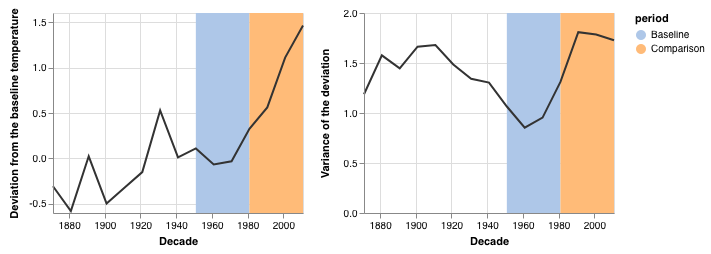

In [61]:
#https://altair-viz.github.io/gallery/falkensee.html

mean = alt.Chart(mean_var).mark_line(color='#333').encode(
    x=alt.X('decade:T', axis=alt.Axis(title='Decade', format='%Y')),
    y=alt.Y('mean', axis=alt.Axis(title='Deviation from the baseline temperature')),
).properties(
    width=250,
    height=200
)
    
var = alt.Chart(mean_var).mark_line(color='#333').encode(
    x=alt.X('decade:T', axis=alt.Axis(title='Decade', format='%Y')),
    y=alt.Y('var', axis=alt.Axis(title='Variance of the deviation'))
    
).properties(
    width=250,
    height=200
)

areas = alt.pd.DataFrame([{
            'start': '1951',
            'end': '1981',
            'period': 'Baseline'
          },
          {
            'start': '1981',
            'end': '2011',
            'period': 'Comparison'
          }])

rect = alt.Chart(areas).mark_rect().encode(
    x='start:T',
    x2='end:T',
    color= alt.Color('period:N', scale=alt.Scale(domain=['Baseline', 'Comparison'],
                      range=['#aec7e8', '#ffbb78'])),
)
(rect + mean) | (rect + var)

We see that the deviation of from the baseline temperature (left chart) changes from negative to positive values. There are two noticeable spikes in the data. One around 1890 and the other around 1930. Browsing Wikipedia reveals that at least for the United States, these spikes correspond to documented heat waves in [1896](https://en.wikipedia.org/wiki/1896_Eastern_North_America_heat_wave) and [1936](https://en.wikipedia.org/wiki/1936_North_American_heat_wave). Not that these explain the spikes but at least the data is consistent with the events. (Remember the data shows the summer months only.)

The variance does not have the same visual trend as the mean temperature.

In [62]:
stations_per_decade = nh_loc_sb.groupby('decade')['station_id'].nunique().reset_index()
stations_per_decade['decade'] = stations_per_decade['decade'].astype(str)

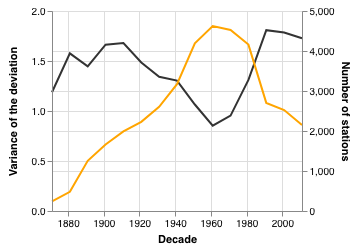

In [63]:
var = alt.Chart(mean_var).mark_line(color='#333').encode(
    x=alt.X('decade:T', axis=alt.Axis(title='Decade', format='%Y')),
    y=alt.Y('var', axis=alt.Axis(title='Variance of the deviation'))    
).properties(
    width=250,
    height=200
)

no_stations = alt.Chart(stations_per_decade).mark_line(color='orange').encode(
    x=alt.X('decade:T', axis=alt.Axis(title='Decade', format='%Y')),
    y=alt.Y('station_id', axis=alt.Axis(title='Number of stations'))    
).properties(
    width=250,
    height=200
)

alt.layer(var,no_stations).resolve_scale(y='independent')

The black line shows the variance for each decade as a ratio of the baseline. The orange line shows the number of stations reporting temperature measurements for each decade. The more stations report data, the lower is the variance. Intuitively, this makes sense and is in line with the third argument, the measurement errors, by Rhines and Huybers (2013).

Now that we have a relatively good understanding of the biases in the data, let's correct the data for the biases. 

### Removing the sample means independently

In [64]:
c_s = summer_base.copy()

We generate the additional information for the first correction suggested by Rhines and Huybers (2013), which means that we calculate the standard deviation for the comparison periods (`1981 to 2010` and `1981 to today`) separately. We then calculate the z-scores using the baseline mean but the standard deviations from the comparison periods.

In [65]:
sd_2010 = summer[(summer['year']>=1981) & (summer['year']<2011)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()
sd_today = summer[(summer['year']>=1981)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()

In [66]:
c_s_complete = pd.merge(c_s, sd_2010, how='left', \
                       left_on='station_id', right_on='station_id', suffixes=('_base', '_2010'))
c_s_complete = pd.merge(c_s_complete, sd_today, how='left', \
                       left_on='station_id', right_on='station_id', suffixes=('_2010', '_today'))

In [67]:
c_s_complete['z_2010'] = (c_s_complete['JJA']-c_s_complete['mean_base'])/c_s_complete['std_2010']
c_s_complete['z_today'] = (c_s_complete['JJA']-c_s_complete['mean_base'])/c_s_complete['std']

In [68]:
c_s_complete.head()

,station_id,year,JJA,count_base,mean_base,std_base,z_base,count_2010,mean_2010,std_2010,count,mean,std,z_2010,z_today
0,101603550000,1967,2334.00,12.00,2321.42,59.90,0.21,23.00,2447.20,73.62,29.00,2465.54,79.09,0.17,0.16
1,101603550000,1968,2360.67,12.00,2321.42,59.90,0.66,23.00,2447.20,73.62,29.00,2465.54,79.09,0.53,0.50
2,101603550000,1969,2237.33,12.00,2321.42,59.90,-1.40,23.00,2447.20,73.62,29.00,2465.54,79.09,-1.14,-1.06
3,101603550000,1970,2350.67,12.00,2321.42,59.90,0.49,23.00,2447.20,73.62,29.00,2465.54,79.09,0.40,0.37
4,101603550000,1971,2416.00,12.00,2321.42,59.90,1.58,23.00,2447.20,73.62,29.00,2465.54,79.09,1.28,1.20


In [69]:
#https://stackoverflow.com/questions/48856982/divide-data-by-decade-then-plot-it-seaborn-box-and-whisker
c_s_complete['decade'] = (c_s_complete['year'] // 10) * 10 + 1
c_s_complete.loc[(c_s_complete['year'] % 10) == 0, 'decade'] = c_s_complete['decade'] - 10

In [70]:
c_s_complete['station_id'] = c_s_complete['station_id'].astype(str).str[:-1].astype(np.int64)
loc_c_s_complete = pd.merge(c_s_complete, stations, how='left', left_on='station_id', right_on='station_id')

In [71]:
nh_c = loc_c_s_complete[loc_c_s_complete['lat']>0].copy()

In [72]:
nh_c = nh_c[abs(nh_c['z_base'])<5].copy()
nh_c = nh_c[abs(nh_c['z_2010'])<5].copy()
nh_c = nh_c[abs(nh_c['z_today'])<5].copy()
nh_c.dropna(inplace=True)

In [73]:
round(nh_c[(nh_c['year']>1950) & (nh_c['year']<1981)]['z_base'].mean(), 2)
round(nh_c[(nh_c['year']>1950) & (nh_c['year']<1981)]['z_base'].var(), 2)
round(nh_c[(nh_c['year']>=1981) & (nh_c['year']<2011)]['z_2010'].mean(), 2)
round(nh_c[(nh_c['year']>=1981) & (nh_c['year']<2011)]['z_2010'].var(), 2)
round(nh_c[(nh_c['year']>=1981)]['z_today'].mean(), 2)
round(nh_c[(nh_c['year']>=1981)]['z_today'].var(), 2)

-0.0

0.95

0.52

1.24

0.61

1.23

Calculating the z-scores with the period-specific standard deviations reduced the variance significantly. For the comparison period 1981-2010 we have a variance of 1.23. For the comparison period 1981-today we have a variance of 1.24.|

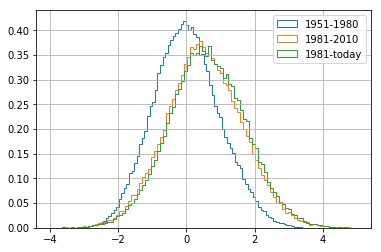

In [74]:
nh_c[(nh_c['year']>1950) & (nh_c['year']<1981)]['z_base'].\
hist(bins=100, histtype = 'step', label='1951-1980', density=True)
nh_c[(nh_c['year']>=1981) & (nh_c['year']<2011)]['z_2010'].\
hist(bins=100, histtype = 'step', label='1981-2010', density=True)
nh_c[(nh_c['year']>=1981)]['z_today'].\
hist(bins=100, histtype = 'step', label='1981-today', density=True).legend(loc='upper right');

The shapes of the distributions of temperatures for the three periods look very similar now.

### Correcting the data for spatial variance

[Spatial variance](https://en.wikipedia.org/wiki/Spatial_variability) may have been introduced because the temperatures were measured at different spatial locations.

This is the easiest corrections because it is also accounted for. The Hansen et al. (2012) paper uses temperature data in a 250km grid, which means that the measurements of all the stations within a given grid have been averaged. 

Here, we use the actual station data. Thus, our analysis does not suffer from this bias. Hence, our corrected variance of 1.24 is the same as reported by Rhines and Huybers (2013) after they have corrected for the spatial variance.

### Correcting for the reduced number of stations

A decrease in stations that measure temperatures means that the density of stations in each of the 250km grids decreases and in turn, the likelihood of measurement errors increases. Rhines and Huybers (2013) argue that the measurement error is 1 degree Celsius in each grid. They correct the data by multiplying the error with the ratio of stations available in the baseline and comparison periods. 

Since we use the fine-granular station data, we can create the subset of stations that report temperatures for both the baseline and the comparison periods. Of course, we also need to apply the correction for the normalization. 

In [75]:
all_time = summer[summer['station_id'].isin(prior_and_base_and_beyond)].copy()
len(all_time['station_id'].unique())

3195

We use the data of 3,195 stations. These stations report across the whole timeframe.

In [76]:
at_base = all_time[(all_time['year']>1950) & (all_time['year']<1981)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()
at_sd_2010 = all_time[(all_time['year']>=1981) & (all_time['year']<2011)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()
at_sd_today = all_time[(all_time['year']>=1981)].copy().\
groupby('station_id')['JJA'].agg(['count','mean','std']).reset_index()

In [77]:
at = pd.merge(all_time, at_base, how='left', \
                       left_on='station_id', right_on='station_id')
at = pd.merge(at, at_sd_2010, how='left', \
                       left_on='station_id', right_on='station_id', suffixes=('_base', '_sd_2010'))
at = pd.merge(at, at_sd_today, how='left', \
                       left_on='station_id', right_on='station_id', suffixes=('_sd_2010', '_sd_today'))


In [78]:
at['z_base'] = (at['JJA']-at['mean_base'])/at['std_base']
at['z_2010'] = (at['JJA']-at['mean_base'])/at['std_sd_2010']
at['z_today'] = (at['JJA']-at['mean_base'])/at['std']

In [79]:
at['decade'] = (at['year'] // 10) * 10 + 1
at.loc[(at['year'] % 10) == 0, 'decade'] = at['decade'] - 10

In [80]:
at['station_id'] = at['station_id'].astype(str).str[:-1].astype(np.int64)
loc_at = pd.merge(at, stations, how='left', left_on='station_id', right_on='station_id')

In [81]:
nh_at = loc_at[loc_at['lat']>0].copy()

In [82]:
nh_at = nh_at[abs(nh_at['z_base'])<5].copy()
nh_at = nh_at[abs(nh_at['z_2010'])<5].copy()
nh_at = nh_at[abs(nh_at['z_today'])<5].copy()
nh_at.dropna(inplace=True)

In [83]:
round(nh_at[(nh_at['year']>1950) & (nh_at['year']<1981)]['z_base'].mean(), 2)
round(nh_at[(nh_at['year']>1950) & (nh_at['year']<1981)]['z_base'].var(), 2)
round(nh_at[(nh_at['year']>=1981) & (nh_at['year']<2011)]['z_2010'].mean(), 2)
round(nh_at[(nh_at['year']>=1981) & (nh_at['year']<2011)]['z_2010'].var(), 2)
round(nh_at[(nh_at['year']>=1981)]['z_today'].mean(), 2)
round(nh_at[(nh_at['year']>=1981)]['z_today'].var(), 2)

-0.0

0.96

0.47

1.18

0.56

1.18

The difference in the variance is further reduced but not to the extent that Rhines and Huyber (2013) suggest.

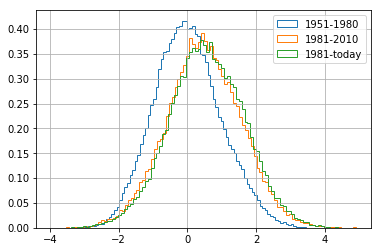

In [84]:
nh_at[(nh_at['year']>1950) & (nh_at['year']<1981)]['z_base'].\
hist(bins=100, histtype = 'step', label='1951-1980', density=True)
nh_at[(nh_at['year']>=1981) & (nh_at['year']<2011)]['z_2010'].\
hist(bins=100, histtype = 'step', label='1981-2010', density=True)
nh_at[(nh_at['year']>=1981)]['z_today'].\
hist(bins=100, histtype = 'step', label='1981-today', density=True).legend(loc='upper right');

We test whether there is a significant difference in the variance. We use Brown and Forsythe's (174) test for homogeneity of variance. 

In [85]:
import scipy.stats as sc

In [86]:
b_2010 = sc.levene(nh_at[(nh_at['year']>1950) & (nh_at['year']<1981)]['z_base'],\
          nh_at[(nh_at['year']>=1981) & (nh_at['year']<2011)]['z_2010'], \
          center='median')


In [87]:
b_2010

LeveneResult(statistic=552.056704774557, pvalue=8.084911421388749e-122)

In [88]:
b_today = sc.levene(nh_at[(nh_at['year']>1950) & (nh_at['year']<1981)]['z_base'],\
                nh_at[(nh_at['year']>=1981)]['z_today'], center='median')

In [89]:
b_today

LeveneResult(statistic=669.655486266252, pvalue=2.632800289108707e-147)

The difference in variance is significant for both comparison periods. Despite the reduction in the variance due to the bias corrections, the remaining variance in the comparison periods is still significantly different from the baseline period. In conclusion, it seems that Rhines and Huyber (2013) are correct when pointing out the biased variance but Hansen et al. (2012) are still correct in their assessment that both the mean and the variance change.

Interestingly, the question of whether the variance is changing appears to be an open question in the literature. The following article offers a quick summary of the various positions on the issue:
> Alexander and Perkins (2013): Debate heating up over changes in climate variability. Environmental Research Letters (8:2013). DOI: [10.1088/1748-9326/8/4/041001](http://iopscience.iop.org/article/10.1088/1748-9326/8/4/041001/pdf)


## Data Wrangling for further processing

The dataset is very large. Let's condense it for further visualization work:
* To display the histograms, we need the z_scores and the decade.
* We only need the data since 1951.

In [90]:
nh_hist_data = nh_at[nh_at['decade']>1941][['z_base', 'z_2010', 'z_today' ,'decade']].copy()

In [91]:
nh_h_b = nh_hist_data[(nh_hist_data['decade']>=1951) &\
                      (nh_hist_data['decade']<1981)][['z_base', 'decade']]
nh_h_b.rename(columns={"z_base": "z"}, inplace=True)
nh_h_t = nh_hist_data[(nh_hist_data['decade']>=1981)][['z_today', 'decade']]
nh_h_t.rename(columns={"z_today": "z"}, inplace=True)

In [92]:
nh_hist = nh_h_b.append(nh_h_t, ignore_index=True)

In [93]:
nh_hist_c = nh_hist.groupby(['decade', pd.cut(nh_hist['z'], 200)])['z'].\
agg(['count']).reset_index()

For better visualization, we are only interested in the left value of the interval of each bin.

In [94]:
nh_hist_c['z'] = nh_hist_c['z'].apply(lambda x: x.left)
nh_hist_c['z'] = nh_hist_c['z'].astype(np.float64)

In [95]:
nh_hist_c.head()

,decade,z,count
0,1951,-3.63,1
1,1951,-3.33,1
2,1951,-3.24,1
3,1951,-3.19,1
4,1951,-3.10,1


In [96]:
nh_hist_c['d'] = nh_hist_c.groupby('decade')['count'].transform(lambda x: x.sum())
nh_hist_c['d'] = nh_hist_c['count']/nh_hist_c['d']
nh_hist_c.head()

,decade,z,count,d
0,1951,-3.63,1,0.00
1,1951,-3.33,1,0.00
2,1951,-3.24,1,0.00
3,1951,-3.19,1,0.00
4,1951,-3.10,1,0.00


## Final visualization

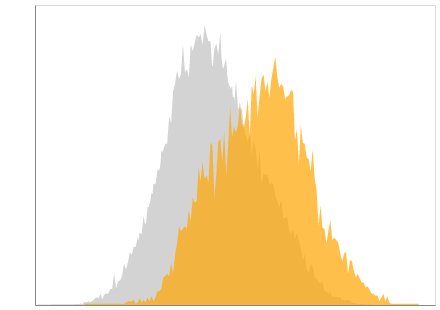

In [98]:
base = alt.Chart(nh_hist_c[nh_hist_c['decade']<1981]).mark_area(color='lightgrey').encode(
    x = alt.X('z'),
    y = alt.Y('d'),
    detail='decade'
)
today = alt.Chart(nh_hist_c[nh_hist_c['decade']>2001]).mark_area(opacity=0.7, color='orange').encode(
    x = alt.X('z', axis=alt.Axis(title=None, grid=False, ticks=False, labels=False)),
    y = alt.Y('d', axis=alt.Axis(title=None, grid=False, ticks=False, labels=False)),
    detail='decade',
)

base + today

We have removed all the axis labels to let the data speak for itself. Obviously, this is just a quick attempt to replicate the visualization itself. The New Times version has comprehensive annotations that help to interpret the visualization. This requires a visualization framework that is more powerful in developing custom visualizations (e.g., [D3.js](https://d3js.org/)). I will address this in a future post.

However, when comparing our version with the version in the New York Times, we notice that the shift in the mean is similar but the difference in the general shape of the distributions is far less pronounced.

## Final Thoughts

Replicating the original visualizations of the Hansen et al. (2012) paper was relatively easy. Correcting the underlying data for the biases as recommended by Rhines and Huyber (2013) was far more difficult because we had to interpret the recommendations. This highlights the importance of publishing code and data (e.g., as Jupyter files). Then, everyone can understand the process from raw data to results to visualization.

The effect of the recommended corrections to the data attenuates the implications of the data. While the shift toward higher temperatures seems to be clear, the debate is still open on whether we also have more extreme weather (temperatures in the tails of the distribution). This highlights one of the biggest challenges in data analytics: without a deep understanding of the data and its limitations, you cannot derive robust implications (The analysis above is just a very superficial attempt!). 

Our analysis also highlights that data preparation, data wrangling, and robustness checks take up most of the time and effort. The final result does not communicate the amount of work that went into. Thus, it is very important to be clear about the objectives of a data analytics product. If you just want to explore a dataset, quick and dirty is enough, if you want to inform your paying audience, you need considerable more resources (as evidenced by the New York Times article). If you want to inform political decisions and investments into the fight against climate change, you need the combined earnest work of countless researchers.

### Literature

* Alexander and Perkins (2013): Debate heating up over changes in climate variability. Environmental Research Letters (8:2013). DOI: [10.1088/1748-9326/8/4/041001](http://iopscience.iop.org/article/10.1088/1748-9326/8/4/041001/pdf)
* Hansen, Sato, Ruedy (2012): [Perception of Climate Change](http://www.pnas.org/content/109/37/E2415). Proceedings of the National Academy of Sciences, 109(37) E2415-E2423; DOI: [10.1073/pnas.1205276109](https://doi.org/10.1073/pnas.1205276109)
* Rhines and Huybers (2013): [Frequent summer temperature extremes reflect changes in the mean, not the variance](http://www.pnas.org/content/110/7/E546), Proceedings of the National Academy of Sciences, 110(7) E546; DOI: [10.1073/pnas.1218748110](https://doi.org/10.1073/pnas.1218748110)

This project (including the data as of October 10, 2018) is available at [https://github.com/mschermann/loaded_climate_dice](https://github.com/mschermann/loaded_climate_dice).